In [1]:
import torch
from torch import nn, optim

m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [6]:
m

Linear(in_features=20, out_features=30, bias=True)

In [27]:
m = nn.Conv1d(16, 33, 4, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

In [28]:
m

Conv1d(16, 33, kernel_size=(4,), stride=(2,))

In [29]:
input.size()

torch.Size([20, 16, 50])

In [30]:
output.size()

torch.Size([20, 33, 24])

In [8]:
m = nn.Sigmoid()
input = torch.randn(2)
output = m(input)

In [ ]:
m = nn.Conv2d(16, 33, 3, stride=2)
>>> # non-square kernels and unequal stride and with padding
>>> m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
>>> # non-square kernels and unequal stride and with padding and dilation
>>> m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
>>> input = torch.randn(20, 16, 50, 100)
>>> output = m(input)

In [17]:
x = torch.rand(2,2,2)

In [18]:
x

tensor([[[0.9897, 0.8223],
         [0.1808, 0.9612]],

        [[0.3024, 0.3990],
         [0.5685, 0.5640]]])

In [19]:
x = torch.rand(2,2)
x

tensor([[0.3273, 0.3973],
        [0.7176, 0.1065]])

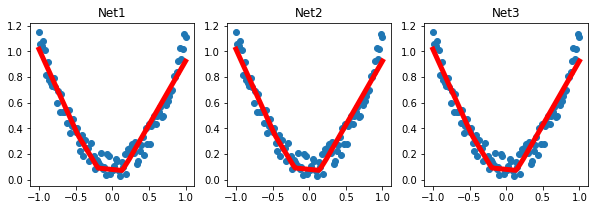

In [42]:
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters


def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()

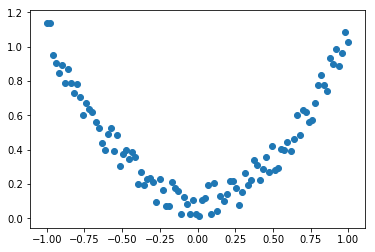

In [113]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
#plt.scatter(x.data.numpy(), y.data.numpy())
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [112]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
print(x)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [117]:
x = torch.linspace(0, 10, 5)
print(x)
print(x.data)
print(x.data.numpy())
x = x.pow(2)
print(x.data)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
[ 0.   2.5  5.   7.5 10. ]
tensor([  0.0000,   6.2500,  25.0000,  56.2500, 100.0000])


In [89]:
a = torch.Tensor([[1, 2, 3, 4],[5, 6, 7, 8]])
b = torch.unsqueeze(a, 0)
c = torch.unsqueeze(a, 1)
d = torch.unsqueeze(a, -1)

In [90]:
print(a)
print(a.size())

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
torch.Size([2, 4])


In [91]:
print(b)
print(b.size())

tensor([[[1., 2., 3., 4.],
         [5., 6., 7., 8.]]])
torch.Size([1, 2, 4])


In [92]:
print(c)
print(c.size())

tensor([[[1., 2., 3., 4.]],

        [[5., 6., 7., 8.]]])
torch.Size([2, 1, 4])


In [93]:
print(d)
print(d.size())

tensor([[[1.],
         [2.],
         [3.],
         [4.]],

        [[5.],
         [6.],
         [7.],
         [8.]]])
torch.Size([2, 4, 1])
